In [90]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
def plot_confidence_intervals(N, mu, sig, max_sample_size):
    X = mu + np.random.randn(N) * sig # By central limit theorem simulates a gaussian with mean mu and standard deviation std
    mean = [None] * max_sample_size
    upper_95 = [None] * max_sample_size
    lower_95 = [None] * max_sample_size
    upper_99 = [None] * max_sample_size
    lower_99 = [None] * max_sample_size
    for c in range(max_sample_size):
        n_samples = c + 1
        x = X[r.sample(range(N), n_samples)]
        std = sig / np.sqrt(n_samples)
        mean[c] = np.sum(x) / n_samples
        upper_95[c] = mu + 1.96 * std
        lower_95[c] = mu - 1.96 * std
        upper_99[c] = mu + 2.58 * std
        lower_99[c] = mu - 2.58 * std
    
    x_axes = [i for i in range(1, max_sample_size + 1)]
    fig1 = plt.figure(1)
    plt.scatter(x_axes, mean, c = 'Blue', marker = 'x')
    plt.plot(x_axes, upper_95, 'r--')
    plt.plot(x_axes, lower_95, 'r--')
    plt.title('Sample Means and 95% confidence intervals')
    plt.xlabel('Sample Size')
    plt.ylabel('x_bar')
    
    fig2 = plt.figure(2)
    plt.scatter(x_axes, mean, c = 'Blue', marker = 'x')
    plt.plot(x_axes, upper_99, 'g--')
    plt.plot(x_axes, lower_99, 'g--')
    plt.title('Sample Means and 99% confidence intervals')
    plt.xlabel('Sample Size')
    plt.ylabel('x_bar')
    plt.show()
    
    # Use the values from part 1 to do part 2
    trials = 10000
    sample_mean_successes(mu , N, trials, X, 2.78, 4.6, 5)
    sample_mean_successes(mu, N, trials, X, 2.02, 2.7, 40)
    sample_mean_successes(mu, N, trials, X, 1.98, 2.62, 120)
    

In [91]:
def sample_mean_successes(mu, N, trials, X, t_95, t_99, max_sample_size):
    success_z_95 = 0
    success_z_99 = 0
    success_t_95 = 0
    success_t_99 = 0
    samples = max_sample_size
    for trial in range(trials):
        x = X[r.sample(range(N), samples)]
        sample_mean = np.sum(x) / samples
        sample_std = np.sqrt(np.sum(np.square(x - sample_mean)) / (samples - 1)) / np.sqrt(samples)
        
        z_upper_95 = sample_mean + 1.96 * sample_std
        z_lower_95 = sample_mean - 1.96 * sample_std
        
        z_upper_99 = sample_mean + 2.58 * sample_std
        z_lower_99 = sample_mean - 2.58 * sample_std
        
        t_upper_95 = sample_mean + t_95 * sample_std
        t_lower_95 = sample_mean - t_95 * sample_std
        
        t_upper_99 = sample_mean + t_99 * sample_std
        t_lower_99 = sample_mean - t_99 * sample_std
        
        
        success_z_95 += z_lower_95 <= mu and z_upper_95 >= mu
        success_z_99 += z_lower_99 <= mu and z_upper_99 >= mu
        success_t_95 += t_lower_95 <= mu and t_upper_95 >= mu
        success_t_99 += t_lower_99 <= mu and t_upper_99 >= mu

    print('Success rate using normal, sample = %d' % samples, '95% confidence interval')
    print(success_z_95 / trials)
    print('Success rate using normal, sample = %d' % samples, '99% confidence interval')
    print(success_z_99 / trials)
    print('Success rate using student t, sample = %d' % samples, '95% confidence interval')
    print(success_t_95 / trials)
    print('Success rate using student t, sample = %d' % samples, '99% confidence interval')
    print(success_t_99 / trials)
        

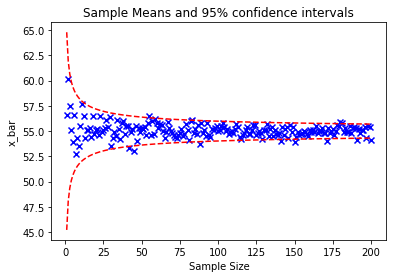

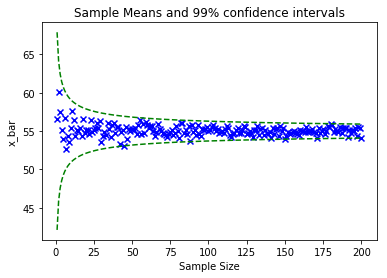

Success rate using normal, sample = 5 95% confidence interval
0.8776
Success rate using normal, sample = 5 99% confidence interval
0.9343
Success rate using student t, sample = 5 95% confidence interval
0.947
Success rate using student t, sample = 5 99% confidence interval
0.9905
Success rate using normal, sample = 40 95% confidence interval
0.9441
Success rate using normal, sample = 40 99% confidence interval
0.9877
Success rate using student t, sample = 40 95% confidence interval
0.9516
Success rate using student t, sample = 40 99% confidence interval
0.9907
Success rate using normal, sample = 120 95% confidence interval
0.9462
Success rate using normal, sample = 120 99% confidence interval
0.9892
Success rate using student t, sample = 120 95% confidence interval
0.9487
Success rate using student t, sample = 120 99% confidence interval
0.9905


In [92]:
N = 1500000
mu = 55
sig = 5
plot_confidence_intervals(N, mu, sig, 200)